In [16]:
import gaia_roman_combined as grc

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib

import astropy
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u

#matplotlib.rc('text',usetex=True)
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
matplotlib.rc('font', **font)

import os

plotpath = './figures/'
if not os.path.isdir(plotpath):
    os.makedirs(plotpath)


In [17]:
'''
This simulation is following the definition of the GPS as defined here:
https://roman-docs.stsci.edu/roman-community-defined-surveys/galactic-plane-survey#GalacticPlaneSurvey-Fig-GPS_FOV
'''

'\nThis simulation is following the definition of the GPS as defined here:\nhttps://roman-docs.stsci.edu/roman-community-defined-surveys/galactic-plane-survey#GalacticPlaneSurvey-Fig-GPS_FOV\n'

In [18]:
#define some default values

roman_pos_floor_err = 0.01*grc.roman_pix_scale #mas, floor or pos uncertainty, (standard is 1% pixel)
gaia_era = 'DR5' #choose from ['DR3','DR4','DR5']

roman_background = 'gbtds_mid_5stripe'
roman_background_level = 'medium'

n_stars = 100
gaia_mags = np.linspace(15,30,n_stars)

In [19]:
print(f'Currently Using a Roman position uncertainty floor of {roman_pos_floor_err} mas')

print()

print('Allowed Roman filters are:',grc.allowed_filters)

print()
print('Allowed Roman background choices are:\n',grc.allowed_backgrounds)
print()
print('Allowed Roman background level choices are:',grc.allowed_background_levels)

print()
print('Allowed Roman MultiAccum choices are:')
print('#MA_Name            Exposure Time (seconds)')
for ma_name in grc.allowed_ma_names:
    print(f'{ma_name:20s}{round(grc.ma_integration_times[ma_name],1)}')


Currently Using a Roman position uncertainty floor of 1.078577405 mas

Allowed Roman filters are: ['F062', 'F087', 'F106', 'F129', 'F146', 'F158', 'F184', 'F213']

Allowed Roman background choices are:
 ['hltds', 'gbtds_mid_5stripe', 'hlwas-medium_field1', 'hlwas-medium_field2', 'hlwas-wide_field1', 'hlwas-wide_field2', 'hlwas-wide_field3', 'hlwas-wide_field4']

Allowed Roman background level choices are: ['medium']

Allowed Roman MultiAccum choices are:
#MA_Name            Exposure Time (seconds)
IM_60_6_S           60
IM_66_6             66
IM_76_7_S           76
IM_85_7             85
IM_95_7             95
IM_101_7            101
IM_107_7            107
IM_107_8_S          107
IM_120_8            120
IM_135_8            135
IM_152_9            152
IM_171_10           171
IM_193_11           193
IM_193_14_S         193
IM_225_13           225
IM_250_14           250
IM_284_14           284
IM_294_16           294
IM_307_16           307
IM_360_16           360
IM_409_16           40

In [20]:
'''
GPS Wide Disk:
l:[-67.00,50.10] degrees
b:[-2,2] degrees
First epoch at ~2027.1: F129, F213
Second epoch at ~2028.5: F158, F184
n_dithers = 2
MA = IM_60_6_S

GPS Wide Carina:
l:[-79.00,-67.00] degrees
b:[-2.5,2] degrees
First epoch at ~2027.1: F129, F213
Second epoch at ~2028.5: F158, F184
n_dithers = 2
MA = IM_60_6_S

GPS TDS Carina:
F213 (min) + F062, F087, F106, F129
F129 and F213 separated by more than 1 year
First epoch at ~2027.1: F129, F158
Second epoch at ~2028.5: F213 (min), F184
l:[-73.77, -71.19] degrees
b:[-1.05, -0.25] degrees
n_dithers = 2
MA = IM_60_6_S

GPS TDS Galactic Center Q4:
F213 (min/hrs/wks) + F129 (wks) + F062, F087, F106
F129 and F213 separated by more than 1 year
First epoch at ~2027.1: F129 (wks), F062
Second epoch at ~2028.5: F213 (min/hrs/wks), F087, F106
l:[-2.80, -0.22] degrees
b:[-0.53, 0.28] degrees
n_dithers = 2
MA = IM_60_6_S

'''

n_min = 43
n_hour = 8
n_week = 5

min_spacing = 500/n_min*u.min
hour_spacing = 80/n_hour*u.hour
week_spacing = 60/n_week*u.day

min_offsets = np.arange(n_min)*min_spacing
hour_offsets = np.arange(n_hour)*hour_spacing
week_offsets = np.arange(n_week)*week_spacing

#example with 100 magnitudes
n_stars = 100


coords_wide_disk = SkyCoord(l=45*u.degree,b=0*u.degree,frame='galactic').icrs
ra_wide_disk,dec_wide_disk = coords_wide_disk.ra.value,coords_wide_disk.dec.value

wide_disk_times = Time([2027.1,2027.1,2028.5,2028.5],format='jyear')
wide_disk_filters = ['F129','F213','F158','F184']
wide_disk_dithers = np.ones(len(wide_disk_filters))*2
wide_disk_MAs = ['IM_60_6_S']*len(wide_disk_filters)

roman_filters = np.unique(wide_disk_filters)

#assuming color of stars in all filters is 0 and zeropoint with Gaia is also 0
roman_mags = np.zeros((n_stars,len(roman_filters))) 
roman_mags[:] = gaia_mags[:,None]         #AB mags

wide_disk_observation_list = list(zip(wide_disk_times.mjd,wide_disk_filters,wide_disk_dithers,wide_disk_MAs))
wide_disk_precision = grc.gaia_roman_astrometric_precision(
    roman_mags = roman_mags,
    roman_filters = roman_filters,
    gaia_mags = gaia_mags,
    roman_pos_floor_err = roman_pos_floor_err,
    observation_list = wide_disk_observation_list,
    gaia_era = gaia_era,
    ra = ra_wide_disk, dec = dec_wide_disk,
    roman_background = roman_background,
    roman_background_level = roman_background_level
)

coords_wide_carina = SkyCoord(l=0.5*(-79.+-67.)*u.degree,
                            b=0.5*(-2.5+2.0)*u.degree,frame='galactic').icrs
ra_wide_carina,dec_wide_carina = coords_wide_carina.ra.value,coords_wide_carina.dec.value

wide_carina_times = Time([2027.1,2027.1,2028.5,2028.5],format='jyear')
wide_carina_filters = ['F129','F213','F158','F184']
wide_carina_dithers = np.ones(len(wide_carina_filters))*2
wide_carina_MAs = ['IM_60_6_S']*len(wide_carina_filters)

roman_filters = np.unique(wide_carina_filters)

#assuming color of stars in all filters is 0 and zeropoint with Gaia is also 0
roman_mags = np.zeros((n_stars,len(roman_filters))) 
roman_mags[:] = gaia_mags[:,None]         #AB mags

wide_carina_observation_list = list(zip(wide_carina_times.mjd,wide_carina_filters,wide_carina_dithers,wide_carina_MAs))
wide_carina_precision = grc.gaia_roman_astrometric_precision(
    roman_mags = roman_mags,
    roman_filters = roman_filters,
    gaia_mags = gaia_mags,
    roman_pos_floor_err = roman_pos_floor_err,
    observation_list = wide_carina_observation_list,
    gaia_era = gaia_era,
    ra = ra_wide_carina, dec = dec_wide_carina,
    roman_background = roman_background,
    roman_background_level = roman_background_level
)

coords_tds_carina = SkyCoord(l=0.5*(-73.77+ -71.19)*u.degree,
                            b=0.5*(-1.05+-0.25)*u.degree,frame='galactic').icrs
ra_tds_carina,dec_tds_carina = coords_tds_carina.ra.value,coords_tds_carina.dec.value


tds_carina_times = Time([2027.1,2027.1,2028.5],format='jyear')
tds_carina_times = Time(np.append(tds_carina_times.jyear,(Time([2028.5],format='jyear')+min_offsets).jyear),format='jyear')
tds_carina_filters = ['F129','F158','F184']
tds_carina_filters.extend(['F213']*(len(tds_carina_times)-len(tds_carina_filters)))

tds_carina_dithers = np.ones(len(tds_carina_filters))*2
tds_carina_MAs = ['IM_60_6_S']*len(tds_carina_filters)

roman_filters = np.unique(tds_carina_filters)

#assuming color of stars in all filters is 0 and zeropoint with Gaia is also 0
roman_mags = np.zeros((n_stars,len(roman_filters))) 
roman_mags[:] = gaia_mags[:,None]         #AB mags

tds_carina_observation_list = list(zip(tds_carina_times.mjd,tds_carina_filters,tds_carina_dithers,tds_carina_MAs))
tds_carina_precision = grc.gaia_roman_astrometric_precision(
    roman_mags = roman_mags,
    roman_filters = roman_filters,
    gaia_mags = gaia_mags,
    roman_pos_floor_err = roman_pos_floor_err,
    observation_list = tds_carina_observation_list,
    gaia_era = gaia_era,
    ra = ra_tds_carina, dec = dec_tds_carina,
    roman_background = roman_background,
    roman_background_level = roman_background_level
)

coords_tds_gcq4 = SkyCoord(l=0.5*(-2.80+ -0.22)*u.degree,
                            b=0.5*(-0.53+ 0.28)*u.degree,frame='galactic').icrs
ra_tds_gcq4,dec_tds_gcq4 = coords_tds_gcq4.ra.value,coords_tds_gcq4.dec.value


tds_gcq4_times = Time([2027.1,2028.5,2028.5],format='jyear')
tds_gcq4_filters = ['F062','F087','F106']
tds_gcq4_times = Time(np.append(tds_gcq4_times.jyear,(Time([2027.1],format='jyear')+week_offsets).jyear),format='jyear')
tds_gcq4_filters.extend(['F129']*(len(tds_gcq4_times)-len(tds_gcq4_filters)))
tds_gcq4_times = Time(np.append(tds_gcq4_times.jyear,(Time([2028.5],format='jyear')+min_offsets).jyear),format='jyear')
tds_gcq4_filters.extend(['F213']*(len(tds_gcq4_times)-len(tds_gcq4_filters)))
tds_gcq4_times = Time(np.append(tds_gcq4_times.jyear,(Time([2028.5],format='jyear')+hour_offsets[1:]).jyear),format='jyear')
tds_gcq4_filters.extend(['F213']*(len(tds_gcq4_times)-len(tds_gcq4_filters)))
tds_gcq4_times = Time(np.append(tds_gcq4_times.jyear,(Time([2028.5],format='jyear')+week_offsets[1:]).jyear),format='jyear')
tds_gcq4_filters.extend(['F213']*(len(tds_gcq4_times)-len(tds_gcq4_filters)))

tds_gcq4_dithers = np.ones(len(tds_gcq4_filters))*2
tds_gcq4_MAs = ['IM_60_6_S']*len(tds_gcq4_filters)

roman_filters = np.unique(tds_gcq4_filters)

#assuming color of stars in all filters is 0 and zeropoint with Gaia is also 0
roman_mags = np.zeros((n_stars,len(roman_filters))) 
roman_mags[:] = gaia_mags[:,None]         #AB mags

tds_gcq4_observation_list = list(zip(tds_gcq4_times.mjd,tds_gcq4_filters,tds_gcq4_dithers,tds_gcq4_MAs))
tds_gcq4_precision = grc.gaia_roman_astrometric_precision(
    roman_mags = roman_mags,
    roman_filters = roman_filters,
    gaia_mags = gaia_mags,
    roman_pos_floor_err = roman_pos_floor_err,
    observation_list = tds_gcq4_observation_list,
    gaia_era = gaia_era,
    ra = ra_tds_gcq4, dec = dec_tds_gcq4,
    roman_background = roman_background,
    roman_background_level = roman_background_level
)



/opt/anaconda3/envs/latest_test/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 4 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/anaconda3/envs/latest_test/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 4 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/anaconda3/envs/latest_test/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 4 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/anaconda3/envs/latest_test/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 4 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/anaconda3/envs/latest_test/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function

In [21]:
precision_dict = {
    'Wide Disk':wide_disk_precision,
    'Wide Carina':wide_carina_precision,
    'TDS Carina':tds_carina_precision,
    'GC Q4':tds_gcq4_precision,
}

/opt/anaconda3/envs/latest_test/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 10000 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


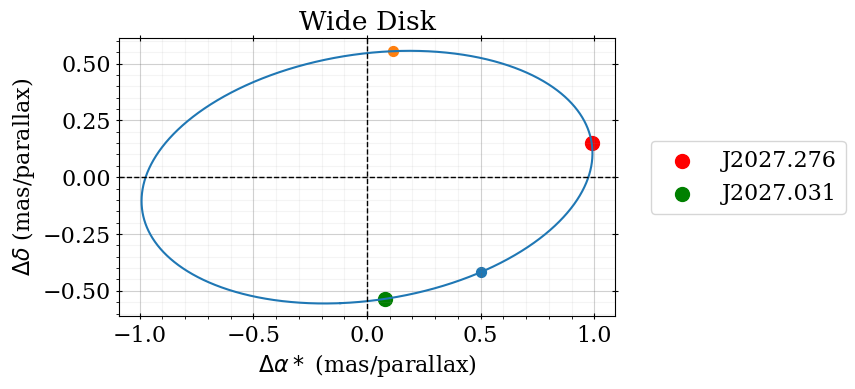

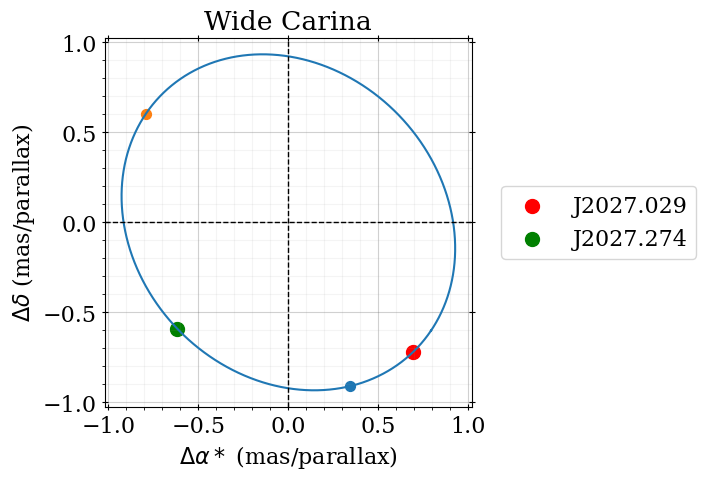

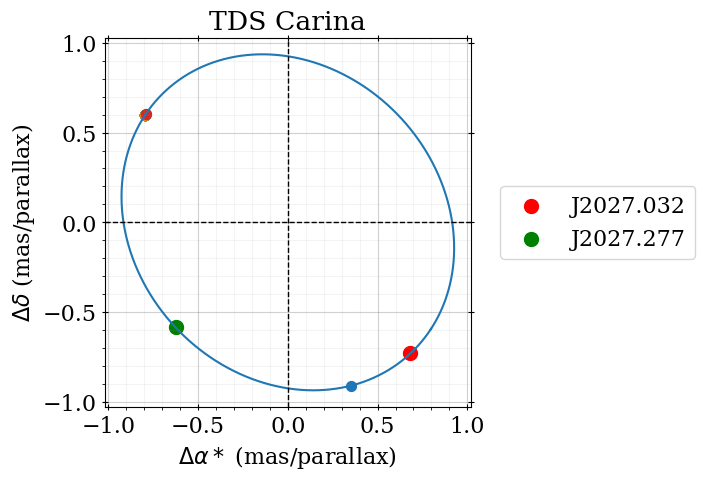

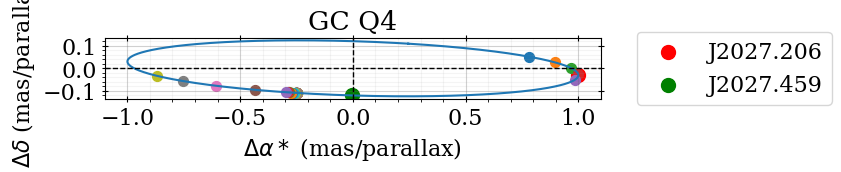

In [22]:
for key in precision_dict:
    ra,dec = precision_dict[key].ra,precision_dict[key].dec    
    times = Time(np.linspace(2027,2028,10000),format='jyear')
    test_parallax_vectors = grc.delta_ra_dec_per_parallax_VECTORIZED(times,Time(2016.0,format='jyear'),ra,dec)
    
    parallax_distances = np.sqrt(np.sum(np.power(test_parallax_vectors,2),axis=1))
    time_ind = np.where(parallax_distances == parallax_distances[times.jyear < 2027.5].max())[0][0]
    best_time = times[time_ind]
    close_ind = np.where(parallax_distances == parallax_distances[times.jyear < 2027.5].min())[0][0]
    close_time = times[close_ind]

    obs_phases = 2027+np.unique(precision_dict[key].obs_times.jyear%1)
    
    plt.figure()
    plt.title(key)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3)
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
    ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
    plt.plot(test_parallax_vectors[:,0],test_parallax_vectors[:,1])
    plt.scatter(test_parallax_vectors[time_ind,0],test_parallax_vectors[time_ind,1],
                label='J%.3f'%(best_time.jyear),c='r',s=100)
    plt.scatter(test_parallax_vectors[close_ind,0],test_parallax_vectors[close_ind,1],
                label='J%.3f'%(close_time.jyear),c='g',s=100)
    for obs_phase in obs_phases:
        match_ind = np.argmin(np.abs(times.jyear-obs_phase))
        # plt.scatter(test_parallax_vectors[match_ind,0],test_parallax_vectors[match_ind,1],
        #             label='J%.3f'%(close_time.jyear),s=50)
        plt.scatter(test_parallax_vectors[match_ind,0],test_parallax_vectors[match_ind,1],
                    s=50)
    plt.xlabel(r'$\Delta\alpha*$ (mas/parallax)')
    plt.ylabel(r'$\Delta\delta$ (mas/parallax)')
    plt.legend(loc=6,bbox_to_anchor=(1.05,0.5))
    plt.axhline(0,c='k',lw=1,ls='--')
    plt.axvline(0,c='k',lw=1,ls='--')
    plt.show()
    


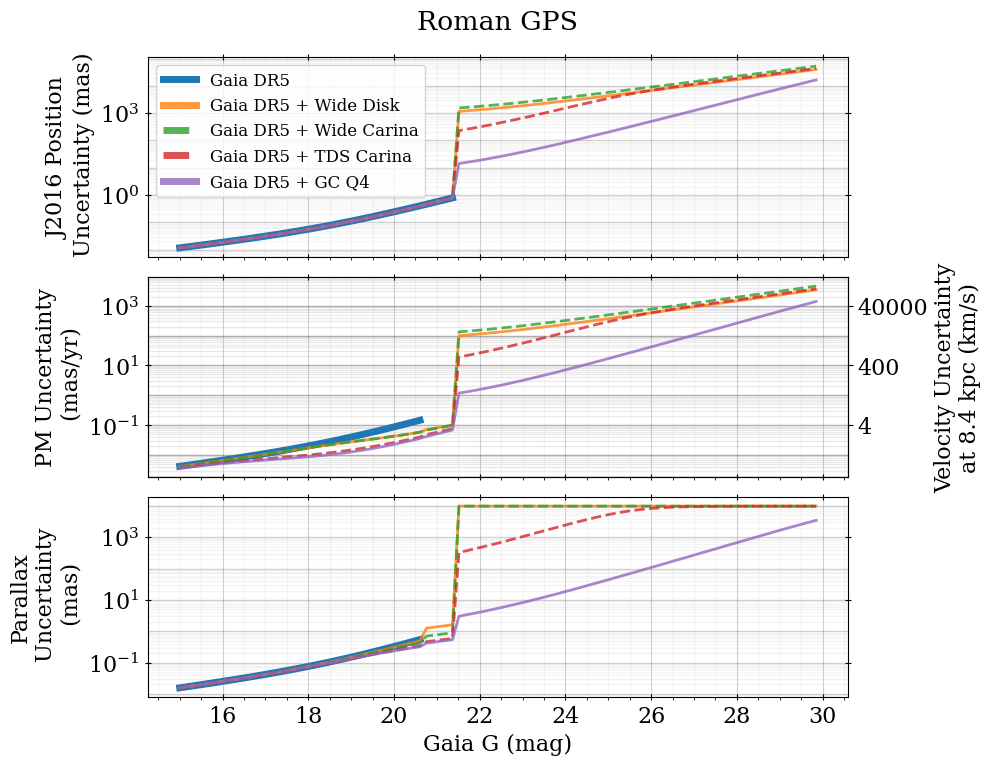

In [24]:
log_scale = True
# log_scale = False


plt.figure(figsize=(10,8))

gs = gridspec.GridSpec(3,1,hspace=0.1,left=0.15,right=0.85,top=0.9,bottom=0.1)
ax = plt.subplot(gs[0])    
plt.title('Roman GPS',pad=20)
if log_scale:
    ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3, axis='x')
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1, axis='x')
plt.minorticks_on()
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(precision_dict[key].gaia_gs,precision_dict[key].gaia_pos_errs,label=f'Gaia {precision_dict[key].gaia_era}',
         zorder=-10,lw=5)
for key in precision_dict:
    if 'Carina' in key:
        ls = '--'
    else:
        ls = '-'
    plt.plot(precision_dict[key].gaia_gs,precision_dict[key].final_pos_errs,
             label=f'Gaia {precision_dict[key].gaia_era} + {key}',ls=ls,alpha=0.8,lw=2)
# plt.xlabel('Gaia G (mag)')
plt.ylabel('J2016 Position\n Uncertainty (mas)')
if not log_scale:
    ylim = plt.ylim()
    plt.ylim(0,min(ylim[1],10.5))
xlim = plt.xlim()
leg = plt.legend(loc='best',fontsize=12)
for line in leg.get_lines():
    line.set_linewidth(5.0)
ax.set_xticklabels([])
yticks = ax.get_yticks()
ylim = ax.get_ylim()
log_ticks = np.round(np.log10(ylim)+np.array([-1,1]))
major_lines = np.power(10,np.arange(log_ticks[0],log_ticks[1]+1))
minor_mults = np.arange(2,10,1)
for line in major_lines:
    plt.axhline(line,color='#666666',linestyle='-',alpha=0.3,zorder=-1e10,lw=1)
    for minor_mult in minor_mults:
        plt.axhline(line*minor_mult,color='#999999',linestyle='-',alpha=0.1,zorder=-1e10,lw=1)
ax.set_ylim(ylim)


ax = plt.subplot(gs[1])    
if log_scale:
    ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3, axis='x')
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1, axis='x')
plt.minorticks_on()
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(precision_dict[key].gaia_gs,precision_dict[key].gaia_pm_errs,
         label=f'Gaia {precision_dict[key].gaia_era}',
         zorder=-10,lw=5)
for key in precision_dict:
    if 'Carina' in key:
        ls = '--'
    else:
        ls = '-'
    plt.plot(precision_dict[key].gaia_gs,precision_dict[key].final_pm_errs,
             label=f'Gaia {precision_dict[key].gaia_era} + {key}',ls=ls,alpha=0.8,lw=2)
# plt.xlabel('Gaia G (mag)')
if not log_scale:
    ylim = plt.ylim()
    plt.ylim(0,min(ylim[1],2.3))
plt.xlim(xlim)
plt.ylabel('PM Uncertainty\n (mas/yr)')
ax.set_xticklabels([])
yticks = ax.get_yticks()
ylim = ax.get_ylim()
log_ticks = np.round(np.log10(ylim)+np.array([-1,1]))
major_lines = np.power(10,np.arange(log_ticks[0],log_ticks[1]+1))
minor_mults = np.arange(2,10,1)
for line in major_lines:
    plt.axhline(line,color='#666666',linestyle='-',alpha=0.3,zorder=-1e10,lw=1)
    for minor_mult in minor_mults:
        plt.axhline(line*minor_mult,color='#999999',linestyle='-',alpha=0.1,zorder=-1e10,lw=1)
ax.set_ylim(ylim)


yticks = ax.get_yticks()
ylim = ax.get_ylim()
log_ticks = np.round(np.log10(ylim)+np.array([-1,1]))
major_lines = np.power(10,np.arange(log_ticks[0],log_ticks[1]+1))
minor_mults = np.arange(2,10,1)
for line in major_lines:
    plt.axhline(line,color='#666666',linestyle='-',alpha=0.3,zorder=-1e10,lw=1)
    for minor_mult in minor_mults:
        plt.axhline(line*minor_mult,color='#999999',linestyle='-',alpha=0.1,zorder=-1e10,lw=1)
ax.set_ylim(ylim)

#show velocity uncertainty at D kpc
D = 40/4.744
# D = 200/4.744
mult = 4.744*D
ylim = np.array(plt.ylim())
yticks = np.array(ax.get_yticks())
ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_yticks(yticks*mult)
ax2.set_yticklabels(np.round(yticks*mult).astype(int))
ax2.set_ylim(ylim*mult)
ax2.set_ylabel('Velocity Uncertainty\nat %.1f kpc (km/s)'%D)


ax = plt.subplot(gs[2])    
if log_scale:
    ax.set_yscale('log')
plt.grid(visible=True, which='major', color='#666666', linestyle='-',alpha=0.3, axis='x')
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.1, axis='x')
plt.minorticks_on()
ax.tick_params(axis='both',direction='inout',length=5,bottom=True,left=True,right=True,top=True)
plt.plot(precision_dict[key].gaia_gs,precision_dict[key].gaia_parallax_errs,
         label=f'Gaia {precision_dict[key].gaia_era}',
         zorder=-10,lw=5)
for key in precision_dict:
    if 'Carina' in key:
        ls = '--'
    else:
        ls = '-'
    plt.plot(precision_dict[key].gaia_gs,precision_dict[key].final_parallax_errs,
             label=f'Gaia {precision_dict[key].gaia_era} + {key}',ls=ls,alpha=0.8,lw=2)
ylim = plt.ylim()
yticks = ax.get_yticks()
ylim = ax.get_ylim()
log_ticks = np.round(np.log10(ylim)+np.array([-1,1]))
major_lines = np.power(10,np.arange(log_ticks[0],log_ticks[1]+1))
minor_mults = np.arange(2,10,1)
for line in major_lines:
    plt.axhline(line,color='#666666',linestyle='-',alpha=0.3,zorder=-1e10,lw=1)
    for minor_mult in minor_mults:
        plt.axhline(line*minor_mult,color='#999999',linestyle='-',alpha=0.1,zorder=-1e10,lw=1)
ax.set_ylim(ylim)

# if not log_scale:
#     plt.ylim(0,min(ylim[1],5))
# else:
#     plt.ylim(ylim[0],min(ylim[1],5e3))
plt.xlim(xlim)
plt.xlabel('Gaia G (mag)')
plt.ylabel('Parallax\n Uncertainty\n (mas)')
plt.savefig(f'{plotpath}GPS_best_astrometry.png')
plt.show()
